# Import Libraries

In [59]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
    mean_squared_error
)
from math import sqrt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Reading in the Data

In [6]:
X_train = pd.read_csv("../data/X_train.csv")
X_test = pd.read_csv("../data/X_test.csv")
y_train = pd.read_csv("../data/y_train.csv")
y_test = pd.read_csv("../data/y_test.csv")

# Wrapper Function

In [48]:
def evaluate_classification_method(mod):
    y_pred = mod.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average="weighted")
    labels = ["Dropout", "Enrolled", "Graduate"]
    full_report = classification_report(y_test, y_pred, target_names=labels)

    print(f"Accuracy classification score: {accuracy}")
    print(f"F1 score: {f1}")
    print(full_report)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    return accuracy, f1, full_report, cm

def test_knn(range, train_accuracy, test_accuracy):
    for a, b in enumerate(range):
        knn = KNeighborsClassifier(n_neighbors = b, p = 2) #p = 2 is euclidean distance
        knn.fit(X_train, y_train.values.ravel())
        train_accuracy[a] = knn.score(X_train, y_train)
        test_accuracy[a] = knn.score(X_test, y_test)
    plt.title('KNN with different number of neighbours')
    plt.plot(knnrange, test_accuracy, label = 'Test Accuracy')
    plt.plot(knnrange, train_accuracy, label = 'Train accuracy')
    plt.legend()
    plt.xticks(knnrange)
    plt.xlabel('Number of neighbours')
    plt.ylabel('Accuracy')
    plt.show()

# KNN Classification

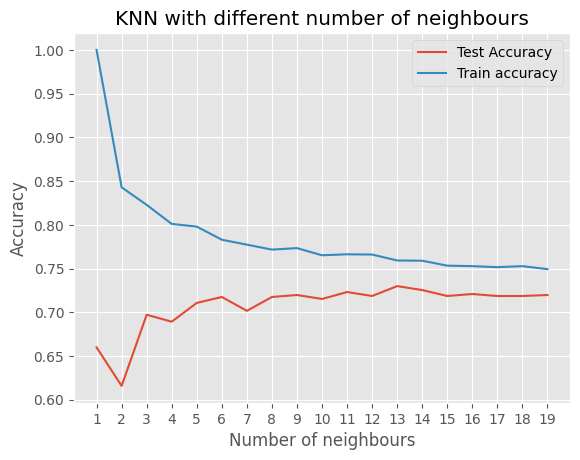

In [50]:
knnrange = np.arange(1, 20)
train_accuracy =np.empty(len(knnrange))
test_accuracy = np.empty(len(knnrange))
test_knn(knnrange, train_accuracy, test_accuracy)

Accuracy classification score: 0.615819209039548
F1 score: 0.6047204559259138
              precision    recall  f1-score   support

     Dropout       0.62      0.78      0.69       284
    Enrolled       0.27      0.36      0.31       151
    Graduate       0.83      0.60      0.69       450

    accuracy                           0.62       885
   macro avg       0.57      0.58      0.56       885
weighted avg       0.67      0.62      0.63       885



(0.615819209039548,
 0.6047204559259138,
 '              precision    recall  f1-score   support\n\n     Dropout       0.62      0.78      0.69       284\n    Enrolled       0.27      0.36      0.31       151\n    Graduate       0.83      0.60      0.69       450\n\n    accuracy                           0.62       885\n   macro avg       0.57      0.58      0.56       885\nweighted avg       0.67      0.62      0.63       885\n',
 array([[222,  38,  24],
        [ 65,  54,  32],
        [ 72, 109, 269]], dtype=int64))

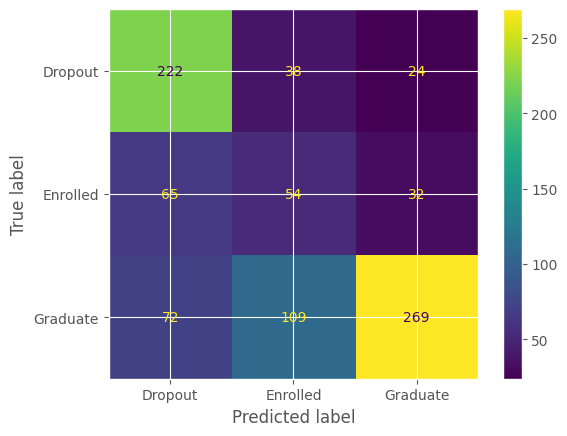

In [53]:
#best Classifier is when number of neighbours is 2
knn_model = KNeighborsClassifier(n_neighbors = 2, p = 2)
knn_model.fit(X_train, y_train.values.ravel())
evaluate_classification_method(knn_model)

# SVM

c:\Users\aeron\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy classification score: 0.7706214689265537
F1 score: 0.7804669362753222
              precision    recall  f1-score   support

     Dropout       0.83      0.69      0.75       284
    Enrolled       0.52      0.42      0.46       151
    Graduate       0.80      0.94      0.87       450

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885



c:\Users\aeron\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy classification score: 0.7717514124293785
F1 score: 0.7838501183902125
              precision    recall  f1-score   support

     Dropout       0.82      0.74      0.78       284
    Enrolled       0.53      0.37      0.44       151
    Graduate       0.80      0.93      0.86       450

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885



c:\Users\aeron\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy classification score: 0.7231638418079096
F1 score: 0.7554211922458125
              precision    recall  f1-score   support

     Dropout       0.83      0.66      0.74       284
    Enrolled       0.38      0.16      0.22       151
    Graduate       0.72      0.95      0.82       450

    accuracy                           0.72       885
   macro avg       0.64      0.59      0.59       885
weighted avg       0.70      0.72      0.69       885



(0.7231638418079096,
 0.7554211922458125,
 '              precision    recall  f1-score   support\n\n     Dropout       0.83      0.66      0.74       284\n    Enrolled       0.38      0.16      0.22       151\n    Graduate       0.72      0.95      0.82       450\n\n    accuracy                           0.72       885\n   macro avg       0.64      0.59      0.59       885\nweighted avg       0.70      0.72      0.69       885\n',
 array([[188,  30,  66],
        [ 26,  24, 101],
        [ 13,   9, 428]], dtype=int64))

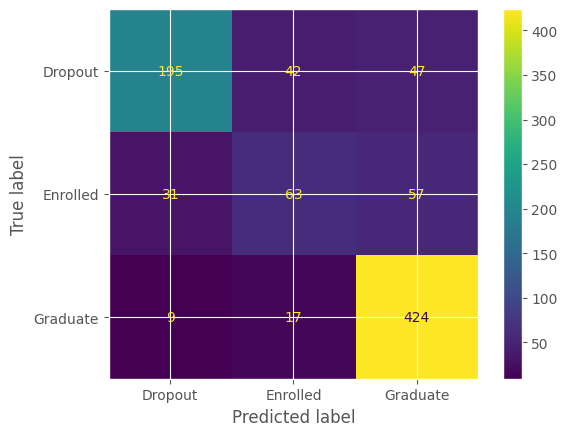

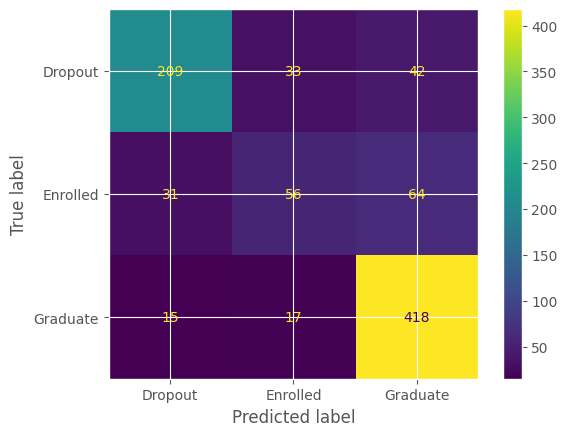

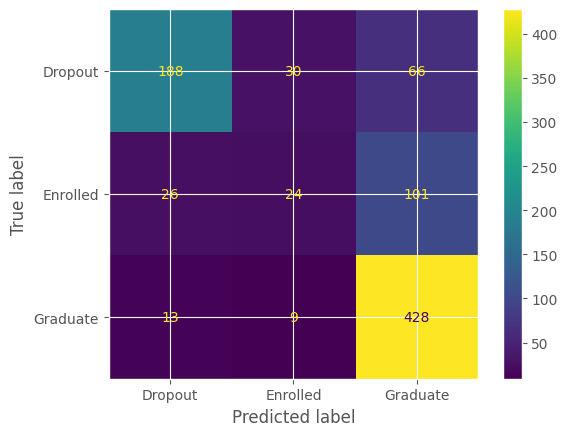

In [56]:
svm_linear_model = svm.SVC(kernel='linear')
svm_linear_model.fit(X_train, y_train)
evaluate_classification_method(svm_linear_model)

svm_rbf_model = svm.SVC(kernel='rbf')
svm_rbf_model.fit(X_train, y_train)
evaluate_classification_method(svm_rbf_model)

svm_poly_model = svm.SVC(kernel='poly', degree = 3)
svm_poly_model.fit(X_train, y_train)
evaluate_classification_method(svm_poly_model)

Radial and Linear performs way better than polynomial SVM fitting, therefore I'll continue using those two, and tune the following gamma and regularisation parameters.

In [61]:
"""
C_range = np.logspace(-2, 10, 13) #taken from SciKit Learn documentation
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma = gamma_range, C = C_range)
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train.values.ravel())

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)
"""